In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

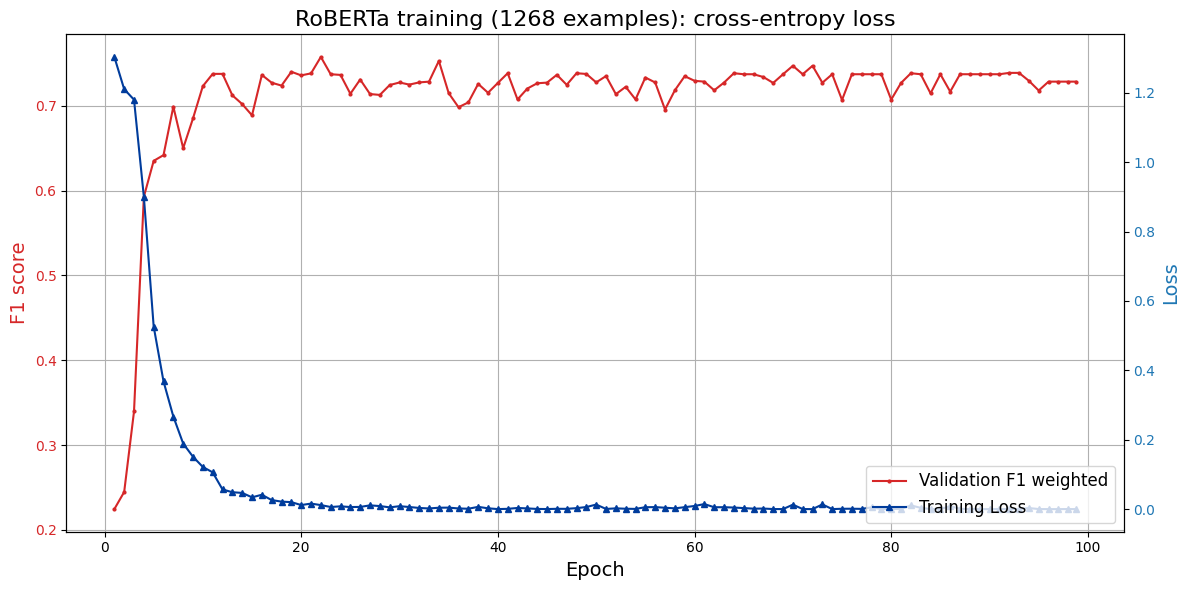

In [6]:
# Load the data
warmup320_df = pd.read_csv('warmup320/metrics/roberta-large_metrics.csv')

# Set the style
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot F1 weighted and Accuracy on the left y-axis
color = 'tab:red'
ax1.set_xlabel('Epoch', fontsize=14)
ax1.set_ylabel('F1 score', color=color, fontsize=14)
ax1.plot(warmup320_df['epoch'], warmup320_df['eval_f1_weighted'], color=color, linestyle='-', marker='.', markersize=4, label='Validation F1 weighted')
#ax1.plot(warmup320_df['epoch'], warmup320_df['eval_accuracy'], color='green', linestyle='-', marker='s', markersize=4, label='Validation Accuracy')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)

# Create a second y-axis for the loss
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Loss', color=color, fontsize=14)  # we already handled the x-label with ax1
#ax2.plot(warmup320_df['epoch'], warmup320_df['eval_loss'], color=color, linestyle='-', marker='^', markersize=4, label='Validation Loss')
ax2.plot(warmup320_df['epoch'], warmup320_df['train_loss'], color="#003C9C", linestyle='-', marker='^', markersize=4, label='Training Loss')
ax2.tick_params(axis='y', labelcolor=color)

# Add a title
plt.title('RoBERTa training (1268 examples): cross-entropy loss', fontsize=16)

# Add legends
# To combine legends from both axes, we get handles and labels from both and pass them to a single legend command
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='lower right', fontsize=12)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("warmup320_FIRST_fold3.pdf") # Save the plot as a PDF
plt.show()

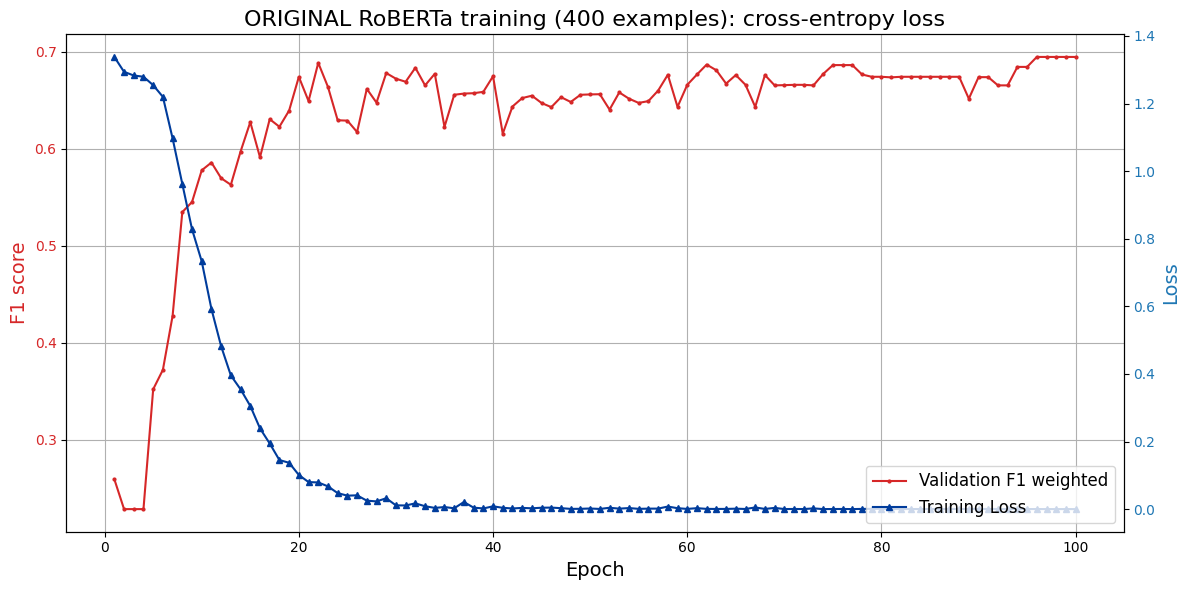

In [4]:
# Load the data
original_df = pd.read_csv(r'F:\VERO UTENTE\Desktop\Uni\dissertation\main\K-fold\large-cross-entropy--5e-5\metrics\roberta-large_metrics_fold_3.csv')

# Set the style
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot F1 weighted and Accuracy on the left y-axis
color = 'tab:red'
ax1.set_xlabel('Epoch', fontsize=14)
ax1.set_ylabel('F1 score', color=color, fontsize=14)
ax1.plot(original_df['epoch'], original_df['eval_f1_weighted'], color=color, linestyle='-', marker='.', markersize=4, label='Validation F1 weighted')
#ax1.plot(lr1e4_lorar32_alpha64_df['epoch'], lr1e4_lorar32_alpha64_df['eval_accuracy'], color='green', linestyle='-', marker='s', markersize=4, label='Validation Accuracy')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)

# Create a second y-axis for the loss
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Loss', color=color, fontsize=14)  # we already handled the x-label with ax1
#ax2.plot(original_df['epoch'], original_df['eval_loss'], color=color, linestyle='-', marker='^', markersize=4, label='Validation Loss')
ax2.plot(original_df['epoch'], original_df['train_loss'], color="#003C9C", linestyle='-', marker='^', markersize=4, label='Training Loss')
ax2.tick_params(axis='y', labelcolor=color)

# Add a title
plt.title('ORIGINAL RoBERTa training (400 examples): cross-entropy loss', fontsize=16)

# Add legends
# To combine legends from both axes, we get handles and labels from both and pass them to a single legend command
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

ax2.legend(lines + lines2, labels + labels2, loc='lower right', fontsize=12)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("original_fold3.pdf") # Save the plot as a PDF
plt.show()

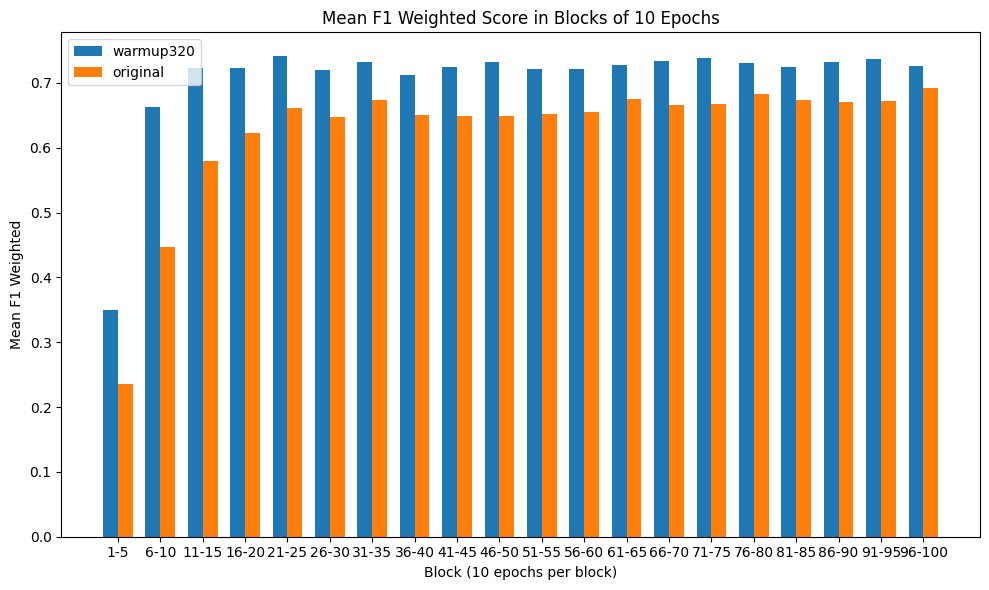

In [7]:
# Compute mean F1 scores in blocks of 10 epochs for warmup320 and original
def mean_f1_by_blocks(df, epoch_col, f1_col, block_size=5):
    df_sorted = df.sort_values(epoch_col)
    blocks = (df_sorted[epoch_col] // block_size).astype(int)
    return df_sorted.groupby(blocks)[f1_col].mean()

warmup320_block_means = mean_f1_by_blocks(warmup320_df, 'epoch', 'eval_f1_weighted', block_size=5)
filtered_original = original_df[original_df['epoch'] < 99]
filtered_original_means = mean_f1_by_blocks(filtered_original, 'epoch', 'eval_f1_weighted', block_size=5)

# Align both series to the same index (union of both)
all_blocks = sorted(set(warmup320_block_means.index).union(set(filtered_original_means.index)))
warmup320_aligned = warmup320_block_means.reindex(all_blocks)
original_aligned = filtered_original_means.reindex(all_blocks)

x = np.arange(len(all_blocks))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, warmup320_aligned, width, label='warmup320')
plt.bar(x + width/2, original_aligned, width, label='original')
plt.xlabel('Block (10 epochs per block)')
plt.ylabel('Mean F1 Weighted')
plt.title('Mean F1 Weighted Score in Blocks of 10 Epochs')
plt.xticks(x, [f'{i*5+1}-{(i+1)*5}' for i in x])
plt.legend()
plt.tight_layout()
plt.show()

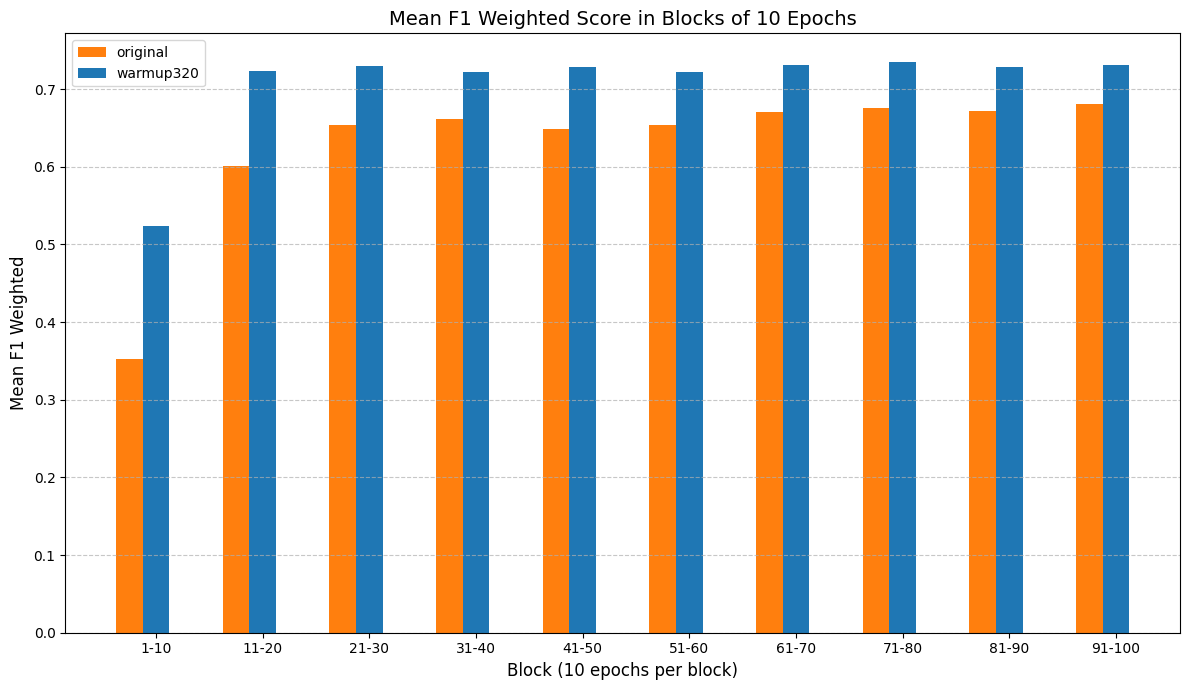

In [8]:
# Compute mean F1 scores in blocks of 10 epochs for warmup320, original, and warmup340s
def mean_f1_by_blocks(df, epoch_col, f1_col, block_size=10):
    df_sorted = df.sort_values(epoch_col)
    blocks = (df_sorted[epoch_col] // block_size).astype(int)
    return df_sorted.groupby(blocks)[f1_col].mean()

warmup320_block_means = mean_f1_by_blocks(warmup320_df, 'epoch', 'eval_f1_weighted', block_size=10)
filtered_original = original_df[original_df['epoch'] < 99]
filtered_original_means = mean_f1_by_blocks(filtered_original, 'epoch', 'eval_f1_weighted', block_size=10)

# Align all series to the same index (union of all)
all_blocks = sorted(set(warmup320_block_means.index).union(
    set(filtered_original_means.index)))

warmup320_aligned = warmup320_block_means.reindex(all_blocks)
original_aligned = filtered_original_means.reindex(all_blocks)

x = np.arange(len(all_blocks))
width = 0.25  # Narrower width to fit three bars

plt.figure(figsize=(12, 7))
# Changed the order to put original first
plt.bar(x - width, original_aligned, width, label='original', color='tab:orange')
plt.bar(x, warmup320_aligned, width, label='warmup320', color='tab:blue')
plt.xlabel('Block (10 epochs per block)', fontsize=12)
plt.ylabel('Mean F1 Weighted', fontsize=12)
plt.title('Mean F1 Weighted Score in Blocks of 10 Epochs', fontsize=14)
plt.xticks(x, [f'{i*10+1}-{(i+1)*10}' for i in x])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()